In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
df = pd.read_csv('seattle-weather.csv')
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [3]:
#data understanding
print ('data shape :', df.shape)

data shape : (1461, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [6]:
df.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<Axes: xlabel='weather', ylabel='Count'>

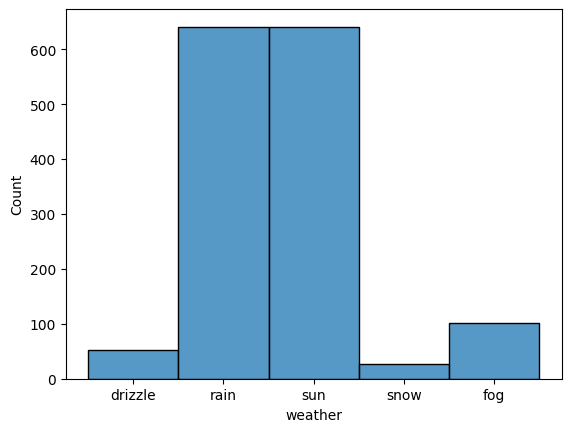

In [7]:
sns.histplot(df['weather'])

In [8]:
#data cleaning
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [9]:
df.duplicated().sum()

0

C:\Users\Hp\AppData\Local\Temp\ipykernel_18568\1534286822.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='weather', data=df, palette='flare')


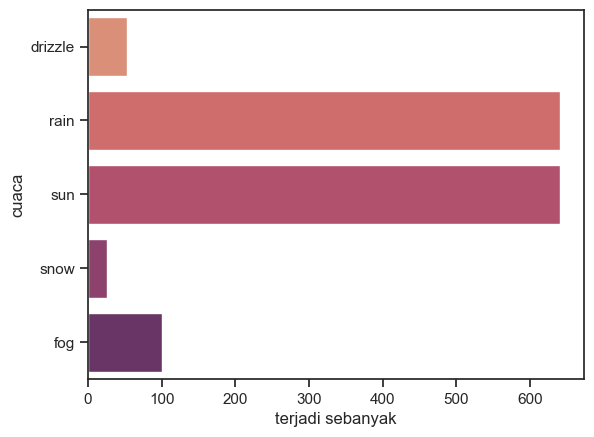

In [10]:
#Exploratory Data Analysis (EDA)
sns.set_theme(style='ticks')
sns.countplot(y='weather', data=df, palette='flare')
plt.ylabel("cuaca")
plt.xlabel('terjadi sebanyak')
plt.show()

In [11]:
#data preparation
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['date'] = label_encoder.fit_transform(df['date'])
df['weather'] = label_encoder.fit_transform(df['weather'])


In [13]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2


In [14]:
x = df.drop(columns = ['weather'])
y = df['weather']

print("x :", x.shape)
print("y : ", y.shape)

x : (1461, 5)
y :  (1461,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [16]:
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {x_test.shape}')



x_train : (1168, 5)
y_train : (1168,)
x_test : (293, 5)
y_test : (293, 5)


In [17]:
#modelling
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
KNN_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print('Akurasi KNN : {:.2F}%' .format(KNN_acc*100))


              precision    recall  f1-score   support

           0       0.38      0.33      0.35         9
           1       0.42      0.44      0.43        25
           2       0.71      0.72      0.72       120
           3       0.33      0.12      0.18         8
           4       0.74      0.75      0.74       131

    accuracy                           0.68       293
   macro avg       0.52      0.47      0.48       293
weighted avg       0.68      0.68      0.68       293

Akurasi KNN : 68.26%


In [18]:
#training
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
#testing
testing = {'date': [1463],
           'precipitation': [12],
           'temp_max': [3.5],
           'temp_min' : [2.0],
           'wind': [7.0]}

testing = pd.DataFrame(testing)
testing

,date,precipitation,temp_max,temp_min,wind
0,1463,12,3.5,2.0,7.0


In [20]:
#prediksi
pred_test = knn.predict(testing)
print("Hasil Prediksi Cuaca Terbaru")
print(pred_test)

Hasil Prediksi Cuaca Terbaru
[2]


In [21]:
df

,date,precipitation,temp_max,temp_min,wind,weather
0,0,0.0,12.8,5.0,4.7,0
1,1,10.9,10.6,2.8,4.5,2
2,2,0.8,11.7,7.2,2.3,2
3,3,20.3,12.2,5.6,4.7,2
4,4,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,1456,8.6,4.4,1.7,2.9,2
1457,1457,1.5,5.0,1.7,1.3,2
1458,1458,0.0,7.2,0.6,2.6,1
1459,1459,0.0,5.6,-1.0,3.4,4
